### The bias-varince trade -off is the POINT where we are adding just noise, by ading model complexity (felxibility)

### As far as linear regressionallows us to predict results in problems with a continious result, such as the price of a house, but it can not be used for binary clasification problems.

### So we need to use a logistic regresion because the aftermath is 0 or 1

The math formula is the Sigmoid function

### We can put our linear model into the Sigmoid Function to get the logistic model

Linear model : y = b_0+b_1*x

Logistic model or Sigmoid function : p = 1/(1+e^(-y))

##### With our logistic model will get values between 0 and 1, then we can set a point (ussually 0.5) above the wich one the result will belong to 1, and below the wich one the result will belong to 0. This point is called cut of point

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### If observe the dataframe is pretty large, and some are NaN so we can not use them to our analysis. We can use the function df.isnull() to see how many are lost (are NaN). If in the same feature we have so many NaN we can not use this in our analysis

In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


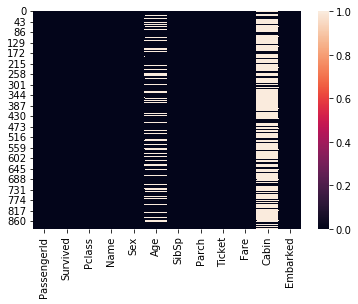

In [5]:
sns.heatmap(train.isnull())

### We observe that the feautre "cabin" has many NaN, so will be better not to use them. In addition, the missing data in "Age" is about 20%, It means that our model can not relay on that feature. What we can do is to fill NaN values with the average age value. Also we can observe if the is a relation between age and other feature, and set the average age based on this relation. E.g. the average age in the 3rd class passenger tend to be les than in the first class

In [6]:
sns.set_style('whitegrid')

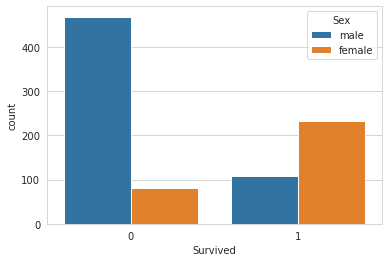

In [7]:
sns.countplot(x='Survived', data=train, hue='Sex')

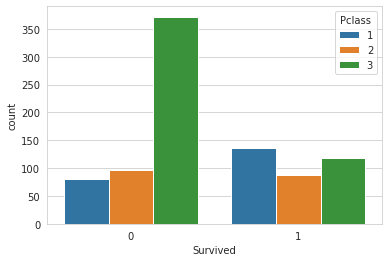

In [8]:
sns.countplot(x='Survived', data=train, hue='Pclass')

/home/hector/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensi

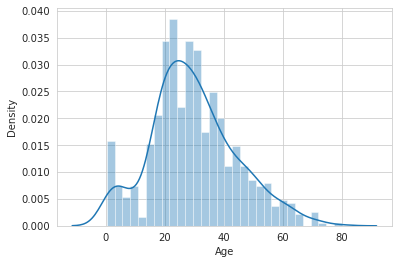

In [9]:
sns.distplot(train['Age'].dropna(), bins=30)

In [10]:
import cufflinks as cf

In [11]:
cf.go_offline()

In [12]:
#rain['Fare'].iplot(kind='hist', bins=50)

#### Recalling the issue with the age missing data. We can observe if there is any relation with other feature

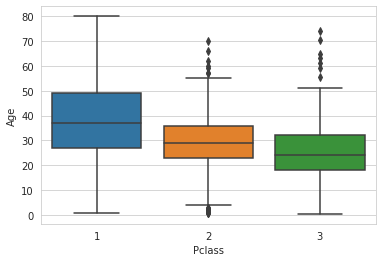

In [13]:
sns.boxplot(x='Pclass', y='Age', data=train)

We can observe that based on the Pclass, the average age is quite different. So we can create a function that fills a certain number in the column 'Age', and this number will be the average age whether tehy belong to 1st,2nd or 3rd class.

In [14]:
def impute_age(y):
    Age = y[0]
    Pclass = y[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [15]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

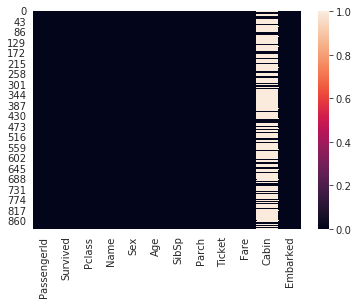

In [16]:
sns.heatmap(train.isnull())

##### There is nothing to do with 'Cabin', so we drop it 

In [17]:
train.drop('Cabin', axis=1, inplace= True)

### Now we have to transform cathegorical features(such as Sex) into dumie variable. Ohterwise our model won t work properly. So we must transform it  into 0 or 1 values

In [18]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [19]:
sex.head() ## We observe number 1 is male, 0 is not male

,male
0,1
1,0
2,0
3,0
4,1


In [20]:
embark= pd.get_dummies(train['Embarked'], drop_first=True)

In [21]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


### We will use pd.concat() to add such columns to our dataframe

In [22]:
train = pd.concat([train,sex,embark], axis=1)

In [23]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


So we don t need the previous 'Sex' and 'Embarked' columns, in addition we don t need their names or tickets

In [24]:
train.drop(['PassengerId'],axis=1, inplace=True)

In [25]:
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


### Begin with the logistic regression

In [26]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'male', 'Q', 'S'],
      dtype='object')

In [45]:
X = train[['Pclass', 'Age', 'SibSp', 'Parch','Fare', 'male','Q', 'S']]

In [46]:
y = train['Survived']

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
logmodel = LogisticRegression()

In [51]:
logmodel.fit(X_train, y_train)

/home/hector/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [52]:
predictions = logmodel.predict(X_test)

In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       154
           1       0.78      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
confusion_matrix(y_test, predictions)

array([[133,  21],
       [ 38,  76]])